In [150]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats

In [151]:
local_data = pd.read_csv("results/local_deltas.csv",index_col = 0)
cloud_data = pd.read_csv("results/cloud_deltas.csv",index_col = 0)
e2e_data = pd.read_csv("results/e2e_deltas.csv",index_col = 0)
e2e_data.head()

,e2e_delta
0,984524879
1,732459708
2,734638657
3,682218884
4,701555710


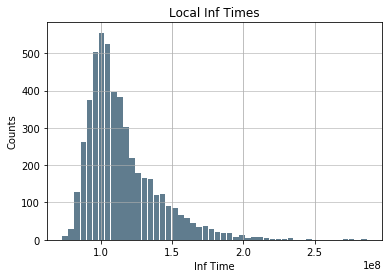

In [152]:
local_data["local_delta"][3:].plot.hist(grid=True, bins=50, rwidth=0.9,color='#607c8e')
plt.title('Local Inf Times')
plt.ylabel('Counts')
plt.xlabel('Inf Time')
plt.grid(axis='y', alpha=0.75)

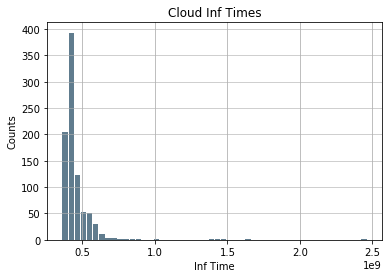

In [153]:
cloud_data["cloud_delta"][3:].plot.hist(grid=True, bins=50, rwidth=0.9,color='#607c8e')
plt.title('Cloud Inf Times')
plt.ylabel('Counts')
plt.xlabel('Inf Time')
plt.grid(axis='y', alpha=0.75)

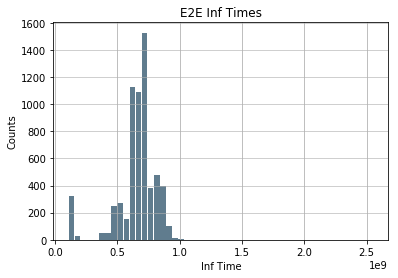

In [154]:
e2e_data["e2e_delta"][3:].plot.hist(grid=True, bins=50, rwidth=0.9,color='#607c8e')
plt.title('E2E Inf Times')
plt.ylabel('Counts')
plt.xlabel('Inf Time')
plt.grid(axis='y', alpha=0.75)

In [574]:
# sigma = np.std(local_data["local_delta"][2:])*10**-6
# mu = np.mean(local_data["local_delta"][2:])*10**-6
# x = local_data["local_delta"][2:]*10**-6

# sigma = np.std(cloud_data["cloud_delta"])*10**-6
# mu = np.mean(cloud_data["cloud_delta"])*10**-6 
# x = cloud_data["cloud_delta"]*10**-6

sigma = np.std(e2e_data["e2e_delta"][2:])*10**-6 
mu = np.mean(e2e_data["e2e_delta"][2:])*10**-6 
x = e2e_data["e2e_delta"][2:]*10**-6

In [575]:
print("mu, sigma: ",mu, sigma)

mu, sigma:  656.8534439440805 170.20163331621202


In [576]:
print(len(x))
z_scores = (x - mu)/sigma
x = [x for x,z in zip(x,z_scores) if np.abs(z) <= 3.1]
print(len(x))

6259
6032


In [577]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, se, m-h, m+h

# mean_confidence_interval(x)

In [578]:
mu, se, lower, upper = mean_confidence_interval(x)
print("range: ",upper-mu)
print("se: ",se)

range:  3.3348876953953095
se:  1.7011631048020355


In [579]:
# x= np.concatenate((np.random.normal(0,1,5000),np.random.normal(10,1,1000)))
# x= np.random.normal(0,1,5000)


print(scipy.stats.skew(x))
print(scipy.stats.skewtest(x))

-1.3630805002105835
SkewtestResult(statistic=-33.33433522560488, pvalue=1.2286891811026962e-243)


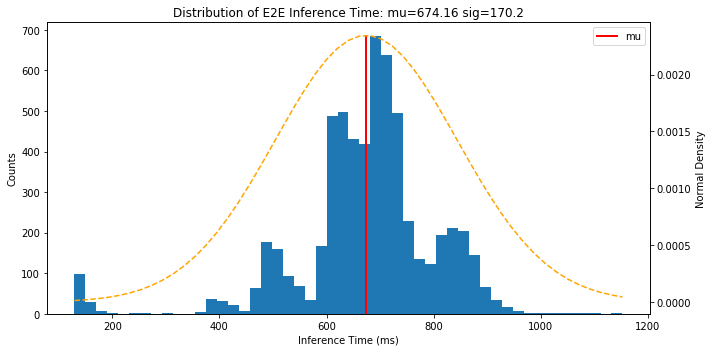

In [549]:
sample_size = len(x)
num_bins = 50

fig, ax = plt.subplots(figsize=(10, 5))

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=0)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax2 = ax.twinx()

ax2.plot(bins, y, '--',color="orange")
ax.set_xlabel('Inference Time (ms)')
ax.set_ylabel('Counts')
ax2.set_ylabel('Normal Density')
# ax.set_title('Distribution of Local Inference Time : mu='+str(round(mu,2))+' sig='+str(round(sigma,2)))
# ax.set_title('Distribution of Cloud Inference Time: mu='+str(round(mu,2))+' sig='+str(round(sigma,2)))
ax.set_title('Distribution of E2E Inference Time: mu='+str(round(mu,2))+' sig='+str(round(sigma,2)))


mean, = ax.plot([mu,mu],[0, max(n)], 'k-', lw=2, color='red')
mean.set_label('mu')
# ax.plot([mu-(1.96*sigma/np.sqrt(sample_size)),mu-(1.96*sigma/np.sqrt(sample_size))],[0, max(n)], 'k-', lw=2, color='navy')
# ax.plot([mu+(1.96*sigma/np.sqrt(sample_size)),mu+(1.96*sigma/np.sqrt(sample_size))],[0, max(n)], 'k-', lw=2, color='navy')

# ax.plot([lower,lower],[0, max(n)], 'k-', lw=2, color='black')
# ax.plot([upper,upper],[0, max(n)], 'k-', lw=2, color='black')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
ax.legend()
plt.show()

# fig.savefig('results/local_distribution.png', dpi=600)
# fig.savefig('results/cloud_distribution.png', dpi=600)
fig.savefig('results/e2e_distribution.png', dpi=600)